# MSc in Data Science 
# Machine Learning 
# Academic Year: 2017-2018

## Logistic Regression for red wines dataset

In [1]:
import pandas as pd
import numpy as np
import math
import matplotlib.cm as cm
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from mpl_toolkits.mplot3d import Axes3D
from numpy import set_printoptions
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.multiclass import OneVsRestClassifier
import collections
from numpy import loadtxt, where
from pylab import scatter, show, legend, xlabel, ylabel
import pylab

%matplotlib inline

We are going to treat the problem as a classification problem and build a Logistic Regression object that will predict the quality of the wine.

Logistic Regression ia classification algorithm and sigmoid function is the core of it. It is used to assign observations to a discrete set of classes. Here we have multiclass Logistic Regression, so we re-run binary classification multiple times, once for each class. This is done automatically by the sklearn library.

First of all, we load the red wine dataset and assign the eleven features/values to X and the target value which is the quality of the wine to Y and then apply the OneVsAll logistic Regression. Overall the concept of this "method" is to train a logistic regression classifier hθ(i)(x) for each class i to predict the probability that y = i and on a new input x, to make a prediction, pick the class i that maximizes the probability. 

In [2]:
balance_data = pd.read_csv('http://mlr.cs.umass.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv', sep = ";", header = 0)
X = balance_data.values[:,0:11]
Y = balance_data.values[:,11:12]
X9_10 = balance_data.values[:,(9,10)]

In [3]:
Y.ravel()
logistic = LogisticRegression()
OVR = OneVsRestClassifier(logistic).fit(X,Y)
print OVR.intercept_
print OVR.coef_
OVR.score(X, Y)

[[-0.03371979]
 [-0.24515889]
 [ 1.71160955]
 [-0.62117725]
 [-1.41293775]
 [-0.67373236]]
[[  1.09708390e-01   2.42796665e+00  -2.23410824e-01   1.64857128e-01
    3.24699685e-01   7.55254980e-02  -7.95550213e-02  -2.99807232e-02
    6.21057142e-01  -3.82170157e-01  -7.79665146e-01]
 [ -2.10323105e-01   2.41543388e+00  -8.33229209e-02   1.75220599e-01
    1.38489113e-01  -3.16965043e-02  -9.70928898e-03  -2.49562733e-01
    3.02405450e-01  -6.43140569e-01  -2.71117246e-01]
 [  2.71481905e-02   1.63716592e+00   3.70049134e-01  -5.51552296e-02
    1.42692998e+00  -2.19455512e-02   2.02353829e-02   1.71287780e+00
    1.33928841e+00  -1.74444799e+00  -8.53826057e-01]
 [  2.42306138e-02  -1.42859485e+00  -9.30425410e-01  -2.50472124e-02
   -3.19602967e-01   2.45704811e-02  -1.31521006e-02  -5.85023580e-01
   -2.02035855e-01   7.48979447e-01   1.97257626e-01]
 [ -4.15938976e-02  -2.88321064e+00   1.30452926e-01   1.05686275e-01
   -1.36620711e+00   1.42124716e-02  -1.66049156e-02  -1.421822

0.58348968105065668

Because of the fact that there are no wines that are categorized as of 1, 2 or 10 quality, the model can only understand that there are only 6 classes (3, 4, 5, 6, 7, 8). This causes a problem if we want to model all 10 classes, because the remaining will never be predicted.

In [5]:
pred = OVR.predict(X)
probs = OVR.predict_proba(X)
print probs.shape
pred1 = np.array([pred])
pred = np.swapaxes(pred1, 0, 1)
print pred

(1599, 6)
[[ 5.]
 [ 5.]
 [ 5.]
 ..., 
 [ 6.]
 [ 6.]
 [ 6.]]


So, now we apply Logistic Regression to the two most prominent features of the data according to the decision tree we have already made and perform the Gradient Descent to find the best weights for the model.

In [6]:
Y = Y.ravel()
lgr = LogisticRegression()
lgr.fit(X9_10, Y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [7]:
lgr.score(X9_10, Y)

0.55284552845528456

In [8]:
def logistic_func(theta, x):
    return float(1) / (1 + math.e**(-x.dot(theta)))
def log_gradient(theta, x, y):
    first_calc = logistic_func(theta, x) - np.squeeze(y)
    final_calc = first_calc.T.dot(x)
    return final_calc
def cost_func(theta, x, y):
    log_func_v = logistic_func(theta,x)
    y = np.squeeze(y)
    step1 = y * np.log(log_func_v)
    step2 = (1-y) * np.log(1 - log_func_v)
    final = -step1 - step2
    return np.mean(final)
def grad_desc(theta_values, X, y, lr=.001, converge_change=.001):
    #normalize
    ws = []
    X = (X - np.mean(X, axis=0)) / np.std(X, axis=0)
    #setup cost iter
    cost_iter = []
    cost = cost_func(theta_values, X, y)
    change_cost = 1
    i = 1
    while(change_cost > converge_change):
        old_cost = cost
        theta_values = theta_values - (lr * log_gradient(theta_values, X, y))
        cost = cost_func(theta_values, X, y)
        cost_iter.append(cost)
        change_cost = old_cost - cost
        ws.append(theta_values)
        i+=1
    return ws, np.array(cost_iter)
def pred_values(theta, X, hard=True):
    #normalize
    X = (X - np.mean(X, axis=0)) / np.std(X, axis=0)
    pred_prob = logistic_func(theta, X)
    pred_value = np.where(pred_prob >= .5, 1, 0)
    if hard:
        return pred_value
    return pred_prob

In [9]:
shape = X9_10.shape[1]
betas = np.zeros(shape)
fitted_values, cost_iter = grad_desc(betas, X9_10, Y)
print(fitted_values)
print cost_iter

[array([ 0.32452841,  0.61468296]), array([ 0.51243083,  0.99716852]), array([ 0.64501738,  1.2780903 ]), array([ 0.74857566,  1.5034991 ]), array([ 0.8341877 ,  1.69356228]), array([ 0.90759179,  1.85896229]), array([ 0.97215092,  2.00607821]), array([ 1.0300059 ,  2.13904324]), array([ 1.08260308,  2.26069857]), array([ 1.13096475,  2.37308688]), array([ 1.1758396 ,  2.47772941]), array([ 1.21779202,  2.57579166]), array([ 1.25725772,  2.66818773]), array([ 1.29457999,  2.75564867]), array([ 1.330034  ,  2.83876895]), array([ 1.36384371,  2.91803893]), array([ 1.39619378,  2.99386816]), array([ 1.42723832,  3.06660241]), array([ 1.45710727,  3.13653648]), array([ 1.48591122,  3.20392384]), array([ 1.51374511,  3.26898412]), array([ 1.5406911 ,  3.33190896]), array([ 1.56682075,  3.39286661]), array([ 1.59219682,  3.45200564]), array([ 1.61687468,  3.50945797]), array([ 1.64090343,  3.56534121]), array([ 1.66432684,  3.61976079]), array([ 1.68718415,  3.6728115 ]), array([ 1.70951061,

In [10]:
w1 = np.array([item[0] for item in fitted_values])
w2 = np.array([item[1] for item in fitted_values])
cost = np.array(cost_iter)
cost.shape

(49,)

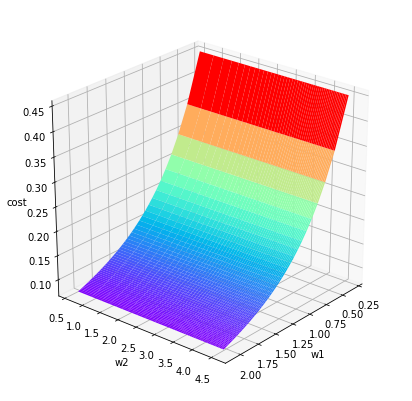

In [11]:
Xs, Ys = np.meshgrid(w1, w2)

fig = plt.figure(figsize=(7,7))
ax = fig.gca(projection="3d")
ax.set_xlabel(r'w1')
ax.set_ylabel(r'w2')
ax.set_zlabel(r'cost')
ax.view_init(elev=25, azim=40)
ax.plot_surface(Xs, Ys, cost, cmap=cm.rainbow)

We can’t use the same cost function Mean Squared Error as we did for linear regression. Cost from linear regression with logistic regression hypothesis leads to non-convex average cost (due to sigmoid transform). Squaring this prediction as we do in MSE results in a non-convex function with many local minimums. If our cost function has many local minimums, gradient descent may not find the optimal global minimum.